# Lab 5 – Feature Detection using SIFT 
### Aim: To detect, describe, and match keypoints between two images using Scale Invariant Feature Transform (SIFT). 
### Objectives: 
- **Extract SIFT keypoints and descriptors from images.** 
- **Match feature descriptors using the BFMatcher algorithm.**
- **Visualize top matches between images.** 
- **Understand scale and rotation invariance in keypoint detection.**

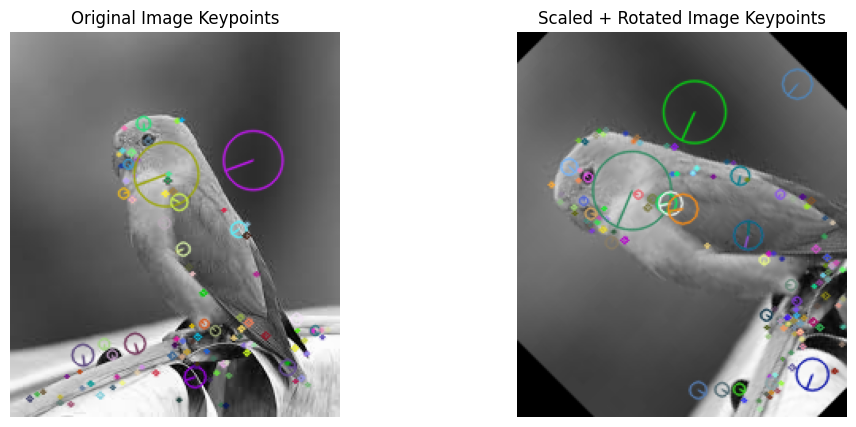

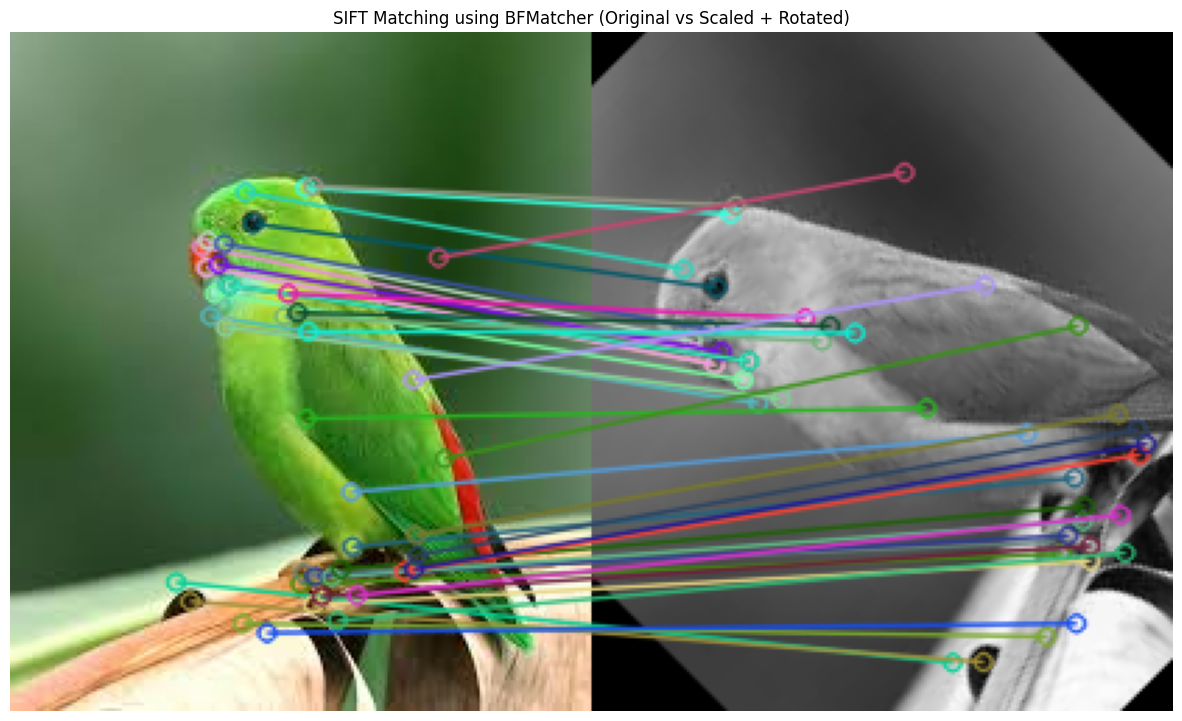

Total keypoints in Image 1: 114
Total keypoints in Image 2: 138
Good matches found: 43


In [2]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load Original Image
img1 = cv2.imread(r'C:\Users\SHRAVINYA\Desktop\parrot.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Step 2: Create Scaled and Rotated Version
scale = 1.2
angle = 45
(h, w) = gray1.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, scale)
gray2 = cv2.warpAffine(gray1, M, (w, h))

# Step 3: Initialize SIFT Detector
sift = cv2.SIFT_create()

# Step 4: Detect Keypoints and Compute Descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Step 5: Visualize Keypoints (Before Matching)
img1_kp = cv2.drawKeypoints(gray1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_kp = cv2.drawKeypoints(gray2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_kp, cmap='gray')
plt.title("Original Image Keypoints")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_kp, cmap='gray')
plt.title("Scaled + Rotated Image Keypoints")
plt.axis('off')
plt.show()

# Step 6: Use BFMatcher for Feature Matching
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches = bf.knnMatch(des1, des2, k=2)

# Step 7: Apply Lowe’s Ratio Test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Step 8: Draw Top Matches
match_img = cv2.drawMatches(
    img1, kp1,
    cv2.cvtColor(gray2, cv2.COLOR_GRAY2BGR),
    kp2, good_matches[:50],
    None, flags=2
)

# Step 9: Display Matched Features
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title("SIFT Matching using BFMatcher (Original vs Scaled + Rotated)")
plt.axis('off')
plt.show()

# Optional: Print number of matches
print(f"Total keypoints in Image 1: {len(kp1)}")
print(f"Total keypoints in Image 2: {len(kp2)}")
print(f"Good matches found: {len(good_matches)}")
